# Heuristic CNN-based Policy

The new heuristic Policy combines two Convolutional models:

- Hard Policy: a model that reliably identifies critical MUST-CONSIDER patterns
- Soft Policy: a model that prefers fields that are strongly connected (via common lines) with other stones

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from domoku import data
from domoku.policies.softadvice import MaxInfluencePolicyParams, MaxInfluencePolicy
from domoku.tools import GomokuTools as gt
from domoku import jupyter_tools as jt
from domoku.board import GomokuBoard

from domoku.policies.maximal_criticality import MaxCriticalityPolicy

In [81]:
SIZE=15

# Combine Soft Advice with Criticality Comprehension

In [5]:
examine = 'g5g9h7i7i8j5g7h8'

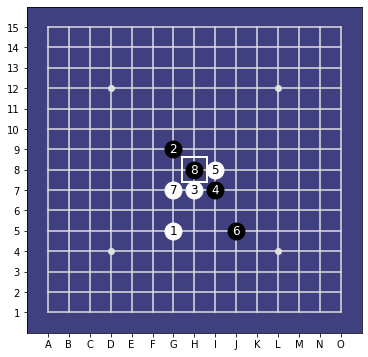

In [32]:
stones = gt.string_to_stones(examine)
board = GomokuBoard(n=SIZE, disp_width=6, stones=stones)
board.display()

In [33]:
sample = data.create_nxnx4(SIZE, stones)
jt.print_bin(sample, combine=True)

shape: (15, 15, 4)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [34]:
hard_policy = MaxCriticalityPolicy(SIZE, overconfidence=2.0)
params = MaxInfluencePolicyParams(
    n=15,
    sigma=.8,
    iota=1,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
soft_policy = MaxInfluencePolicy(params, criticality_model=hard_policy)

In [35]:
jt.vis(soft_policy(sample), scale=1)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  2  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  1 52  1  2  0  1 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 20  0  0  0  0  0]
 [ 0  0  1  1  2  1  1  0  0  1  0  1  0  0  0]
 [ 0  0  1  3  4  6  0  0  0  1  2  1  1  0  0]
 [ 0  0  2  4  6  7 48  3  0 52  2  3  1  1  0]
 [ 0  1  2  4  6  8  0  4  0  0  3  2  2  1  0]
 [ 0  1  2  3  6  6 26  3  1  2  2  2  1  1  0]
 [ 0  1  2  3  3  4  3  2  0  1  2  1  1  0  0]
 [ 0  1  1  2  2  2  2  1  0  0  0  1  1  0  0]
 [ 0  0  1  1  1  1  0  0  0  0  0  0  0  0  0]]


In [36]:
move = soft_policy.draw(sample)
move

('F', 10)

# A Complete Game!

In [65]:
hard_policy = MaxCriticalityPolicy(SIZE, overconfidence=5.0)
params = MaxInfluencePolicyParams(
    n=15,
    sigma=.6,
    iota=2,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
soft_policy = MaxInfluencePolicy(params, criticality_model=hard_policy)

WHITE wins.


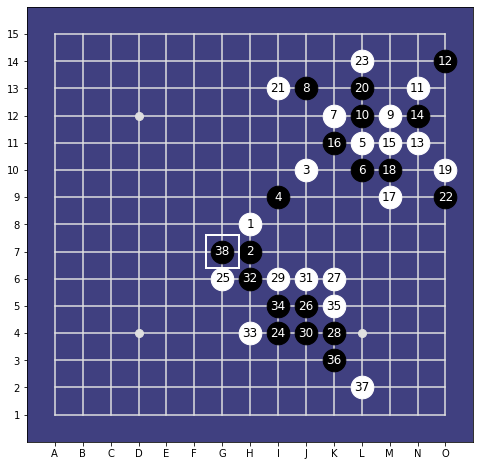

In [76]:
stones = gt.string_to_stones('H8')
board = GomokuBoard(n=15, disp_width=8, stones=stones)
sample = data.create_nxnx4(SIZE, stones)
move = soft_policy.draw(sample)
for _ in range(50):
    board.set(*move)
    sample = data.create_nxnx4(SIZE, board.stones)
    winning_channel = hard_policy.winner(sample)
    if winning_channel is not None:
        winning_color = data.get_winning_color(sample, winning_channel)
        winning_color = 'BLACK' if winning_color == 0 else 'WHITE'
        print(f"{winning_color} wins.")
        break
    move = soft_policy.draw(sample)
#vis(soft_policy(sample), scale=10)
board.display()

---

### Follow a single game step by stet

In [14]:
stones = gt.string_to_stones('H8')
board = GomokuBoard(n=15, disp_width=8, stones=stones)
sample = data.create_nxnx4(SIZE, stones)

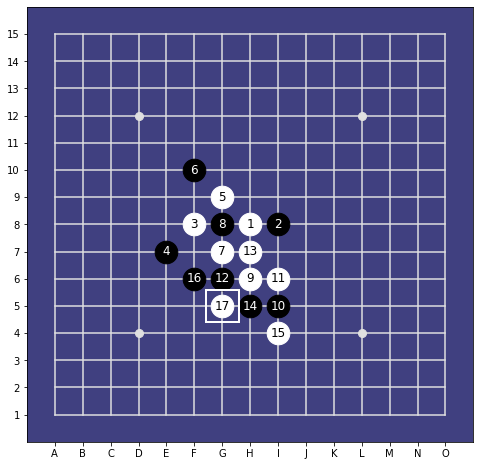

In [107]:
move = soft_policy.draw(sample)
for _ in range(1):
    board.set(*move)
    sample = data.create_nxnx4(SIZE, board.stones)
    winning_channel = hard_policy.winner(sample)
    if winning_channel is not None:
        winning_color = data.get_winning_color(sample, winning_channel)
        winning_color = 'BLACK' if winning_color == 0 else 'WHITE'
        print(f"{winning_color} wins.")
        break
    move = soft_policy.draw(sample)
#vis(soft_policy(sample), scale=10)
board.display()